In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline



In [62]:
bom_gross    = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
the_numbers  = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
rt_info      = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='iso8859_1')
rt_reviews   = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='iso8859_1')
# data_imdbr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
# data_imdbb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
# data_imdbn = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
# data_imdbc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
# data_imdbp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
# data_imdba = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
# data_tmdb  = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [4]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Box Office Mojo

## Clean for studio grouping.
In the cells below, the data is being cleaned for empty cells in studio and summing the total grossing amount to total domestic and foreign.

clean out empty rown in studio column and set to new variable.

Adding the foreing and domestic gross to total_gross column.

In [6]:
bom_clean = bom_gross[bom_gross['studio'].notna()]

In [7]:
bom_clean['foreign_gross'] = bom_clean['foreign_gross'].str.replace(',','').astype(float)

<ipython-input-7-9d1896d0b027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_clean['foreign_gross'] = bom_clean['foreign_gross'].str.replace(',','').astype(float)


In [8]:
bom_clean['total_gross'] = bom_clean.fillna(0)['domestic_gross'] + bom_clean.fillna(0)['foreign_gross']

<ipython-input-8-2e853af365ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_clean['total_gross'] = bom_clean.fillna(0)['domestic_gross'] + bom_clean.fillna(0)['foreign_gross']


Dropping the domestic and foreign columns 

In [9]:
bom_clean.drop('domestic_gross',axis=1,inplace=True)
bom_clean.drop('foreign_gross',axis=1,inplace=True)


C:\Users\ajche\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
bom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        3382 non-null   object 
 1   studio       3382 non-null   object 
 2   year         3382 non-null   int64  
 3   total_gross  3382 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.1+ KB


In [46]:
title_counts = bom_clean['title'].value_counts() > 1

In [51]:
title_counts[title_counts.values == True]

Bluebeard    True
Name: title, dtype: bool

In [91]:
bom_clean[bom_clean['title'] == 'Bluebeard']

title  studio  year  total_gross
317   Bluebeard  Strand  2010      38700.0
3045  Bluebeard   WGUSA  2017      43100.0

In [90]:
bom_clean[(bom_clean['title'] == 'Bluebeard') & (bom_clean['year'] == 2010)]['title'].replace('Bluebeard','Bluebeard2010',inplace=True)

C:\Users\ajche\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Setting Cleaned data in new variable.

In [12]:
bom_top1k_gross = bom_clean.sort_values('total_gross',ascending=False).head(1000)

## Exploratory Data Analysis

### Making a plot of the movie count per production company of the top 1000 grossing movies

<BarContainer object of 65 artists>

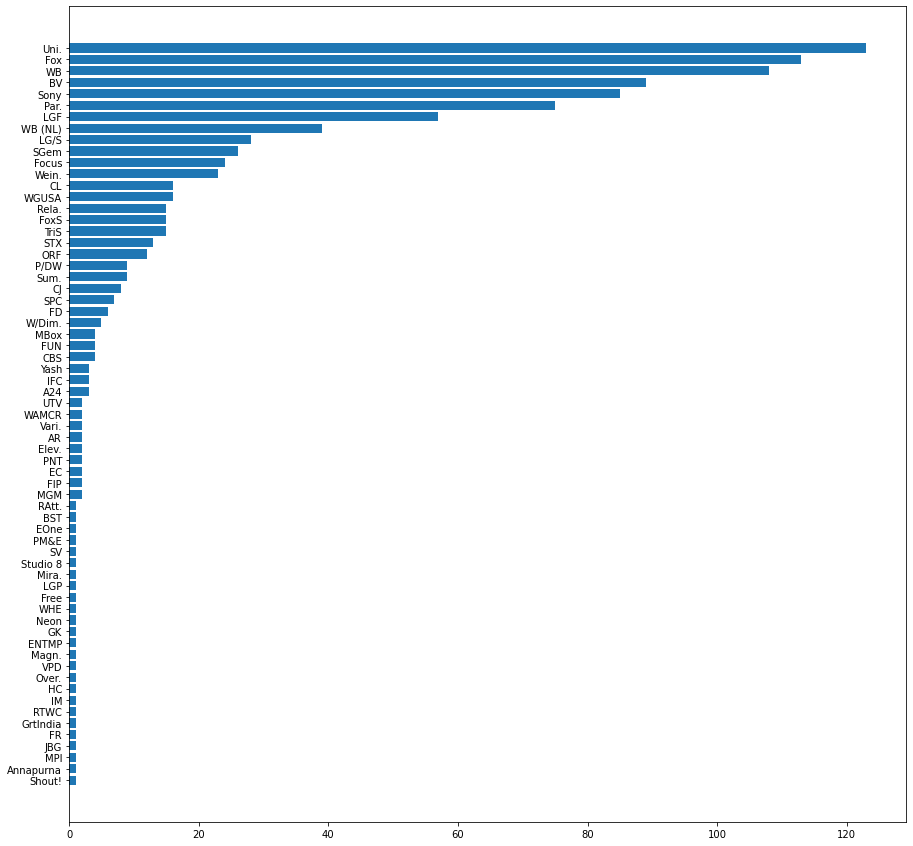

In [24]:
fig , ax = plt.subplots(figsize=(15,15))
ax.barh(bom_top1k_gross['studio'].value_counts().sort_values(ascending=True).index,bom_top1k_gross['studio'].value_counts().sort_values(ascending=True).values)

Out of the top 1000 grossing movies in the data set, this is a bar graph showing the number of movies by production company. The big players in the film industry in terms of sheer numbers are universal, Fax, warner brothers, Walt Disney, Soney, Paramount, and Lionsgate

ISSUES: Looks like warner brothers had two separate tags, need to look into movie titles to figure out what is going ofn with that.

IFC: IFC Films
Uni.: Universal
WB: Warner Brothers
Magn.: Magnolia Studios
Fox: Fox
SPC: Sony Pictures Classics
Sony: Sony Productions
BV: Disney
LGF: Lionsgate
Par.: Paramount
Eros: Eros International Media Ltd. (India Studio)
Wein.: The Weinstein Company
CL: ?
Strand: Strand Studios(Animated Movies)
FoxS: part of The Walt Disney Company (India)


# Rotten Tomatoes

## Data Cleaning

In [92]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [61]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [96]:
rt_reviews.set_index('id',inplace=True)

In [97]:
rt_info.set_index('id',inplace=True)

# The Numbers


## Data Cleaning

In [71]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [116]:
the_numbers.loc()

id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  year  
0         $425,000,000   $760,507,625  $2,776,345,279  2009  
1         $410,600,000   $241,063,875  $1,045,663,875  2011  
2         $350,000,000    $42,762,350    $149,762,350  2019  
3         $330,600,000   $459,005,868  $1,403,013,963  2015  
4         $317,000,000   $620,181,382  $1,316,721,747  2017  
...                ...            ...             ...   ...  
5777            $7,000             $0              $0  2018  
5778            $6,000        $48,482        $240,495  1999  
5779            $5,000         $1,338          $1,338  2005  
5780            $1,400             $0              $0  2015  
5781            $1,100       $181,041        $181,041  2005  

[5782 rows x 7 columns]